<a href="https://colab.research.google.com/github/muawiyashakeel/Machine-Learning-Workflow-with-Random-Forest-Classifier/blob/main/DataAnalysisColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [26]:
data = pd.read_csv('/content/dataset.csv')


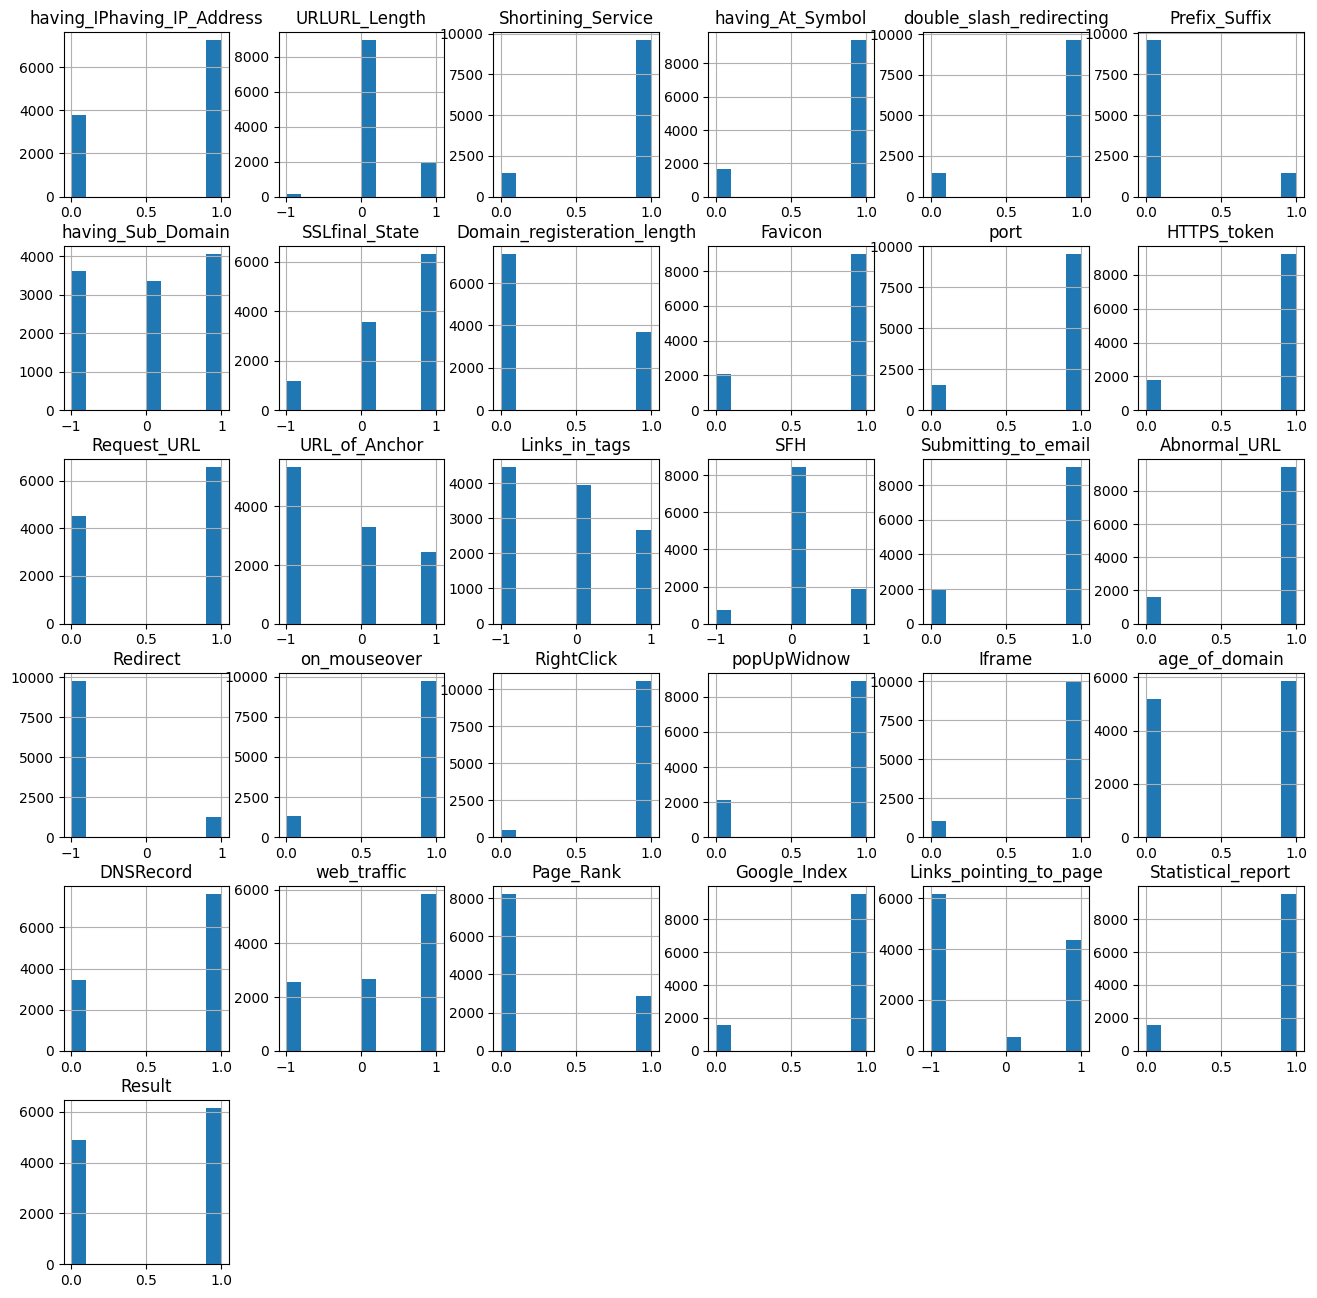

In [27]:
# Ecplore the data using histograms and heatmaps
data.hist(figsize=(16, 16))
plt.show()

In [29]:
# Determine the number of sample and unique elements in all feature
num_sumples = len(data)
unique_elements = data.nunique()
print(unique_elements)

index                          7930
having_IPhaving_IP_Address        2
URLURL_Length                     3
Shortining_Service                2
having_At_Symbol                  2
double_slash_redirecting          2
Prefix_Suffix                     2
having_Sub_Domain                 3
SSLfinal_State                    3
Domain_registeration_length       2
Favicon                           2
port                              2
HTTPS_token                       2
Request_URL                       2
URL_of_Anchor                     3
Links_in_tags                     3
SFH                               3
Submitting_to_email               2
Abnormal_URL                      2
Redirect                          2
on_mouseover                      2
RightClick                        2
popUpWidnow                       2
Iframe                            2
age_of_domain                     2
DNSRecord                         2
web_traffic                       3
Page_Rank                   

In [31]:
# Check for null values
null_values = data.isnull().sum()
print(null_values)

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

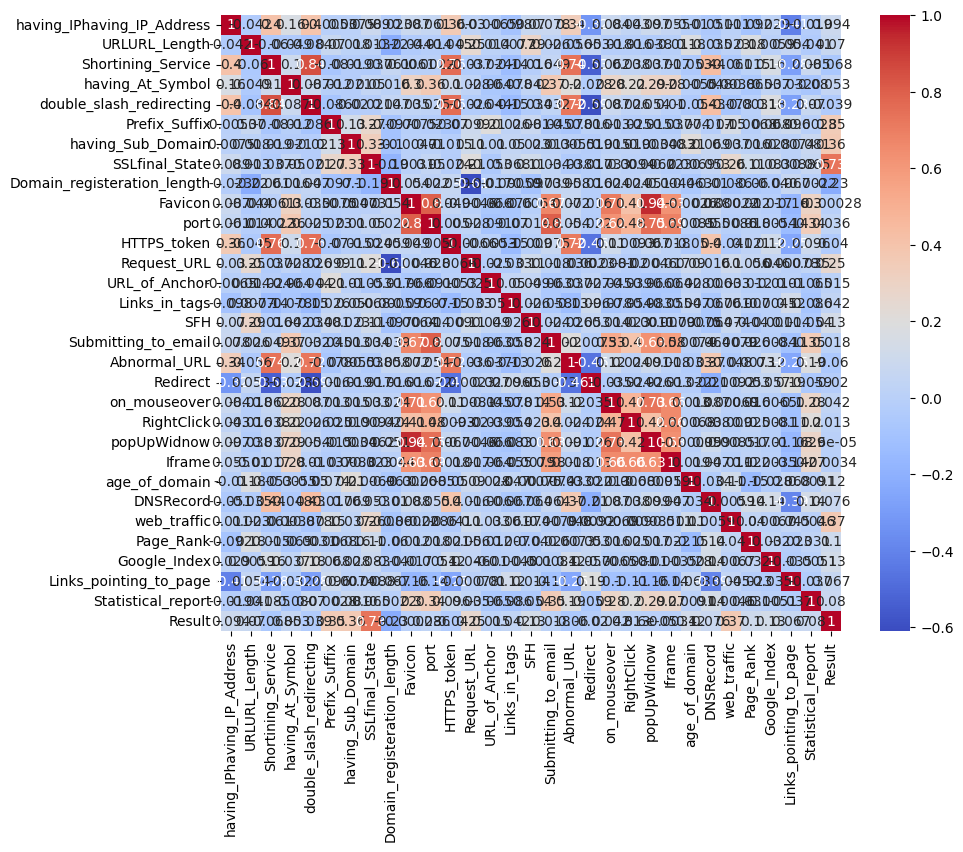

In [33]:
# Correlation analysis
corr_matrix = data.corr(numeric_only= True)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [69]:
# Feature Selection based on correlation
threshold = 0.5 # Set your threshold
correlated_features = set()
for i in range(len(corr_matrix.columns)):
  for j in range(i):
    if abs(corr_matrix.iloc[i, j]) > threshold:
      colname = corr_matrix.columns[i]
      correlated_features.add(colname)
print("Correlated Features:", correlated_features)


Correlated Features: {'double_slash_redirecting', 'Iframe', 'Request_URL', 'Redirect', 'Abnormal_URL', 'popUpWidnow', 'HTTPS_token', 'Submitting_to_email', 'port', 'Result', 'on_mouseover'}


In [39]:
# Data Preprocessing
# Handle categorical data
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
# Remove any rows with missing values
data.dropna(inplace=True)

In [54]:
# Select Feature based on correlation analysis
selected_features = [col for col in data.columns if col not in correlated_features]

# Split data into features (X) and target variable (y)
X = data[selected_features]
y = data['Result']

In [41]:
# Split data into training(70%) adn testing(30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
# Initialize the Random Forest Model
clf = RandomForestClassifier(random_state= 42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [71]:
# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance':
                                      feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance',
                                                          ascending=False)


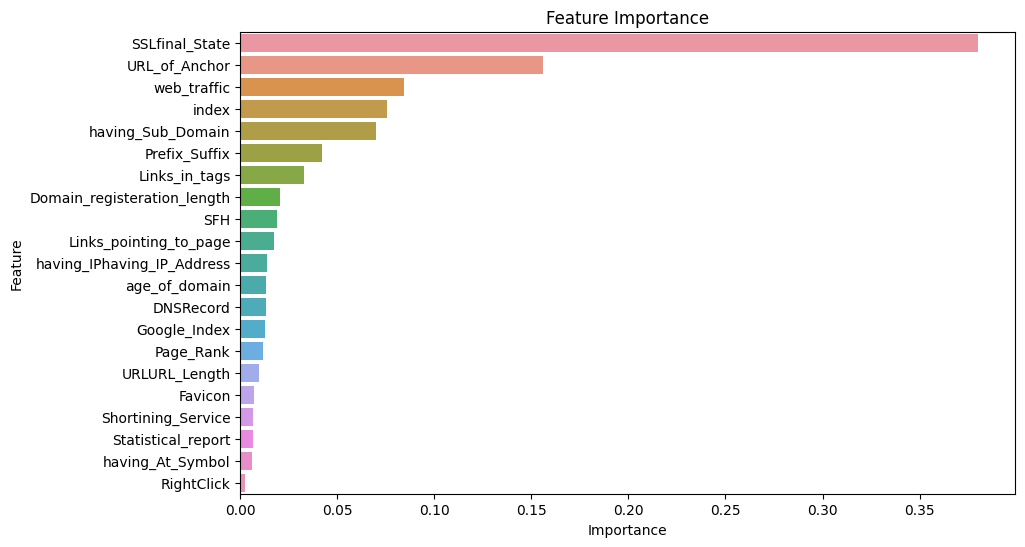

Feature Importances:
                        Feature  Importance
7                SSLfinal_State    0.380391
10                URL_of_Anchor    0.155872
16                  web_traffic    0.084347
0                         index    0.075379
6             having_Sub_Domain    0.070122
5                 Prefix_Suffix    0.042102
11                Links_in_tags    0.032654
8   Domain_registeration_length    0.020553
12                          SFH    0.018955
19       Links_pointing_to_page    0.017523
1    having_IPhaving_IP_Address    0.013568
14                age_of_domain    0.013385
15                    DNSRecord    0.013215
18                 Google_Index    0.012817
17                    Page_Rank    0.011608
2                 URLURL_Length    0.009715
9                       Favicon    0.006751
3            Shortining_Service    0.006586
20           Statistical_report    0.006336
4              having_At_Symbol    0.005839
13                   RightClick    0.002281


In [67]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# Display the feature importances in descending order
print("Feature Importances:")
print(feature_importance_df)

In [47]:
# Predict on the test set
y_pred = clf.predict(X_test)
print(y_pred)

[0 0 0 ... 0 1 0]


In [49]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9574853007688828


In [57]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", cm)

Accuracy: 0.9574853007688828
Precision: 0.9574468085106383
Recall: 0.9681274900398407
F1-Score: 0.962757527733756
Confusion Matrix:
 [[ 902   54]
 [  40 1215]]


In [59]:
# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize a Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Create a GridSearchCV instance
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


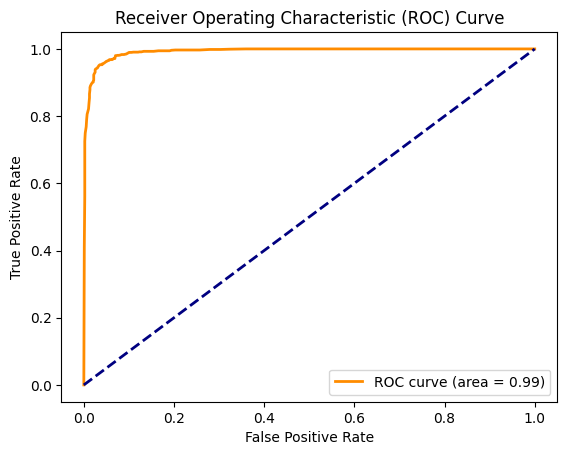

In [50]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [51]:
# K-Fold Cross-Validation
cv_scores = cross_val_score(clf, X, y, cv=5)

# Print results
print("Accuracy:", accuracy)
print("K-Fold Cross-Validation Scores:", cv_scores)

Accuracy: 0.9574853007688828
K-Fold Cross-Validation Scores: [0.97060154 0.96788783 0.96834012 0.94753505 0.9348711 ]


In [60]:
class_distribution = data['Result'].value_counts()
print("Class Distribution:\n", class_distribution)


Class Distribution:
 1    6157
0    4898
Name: Result, dtype: int64


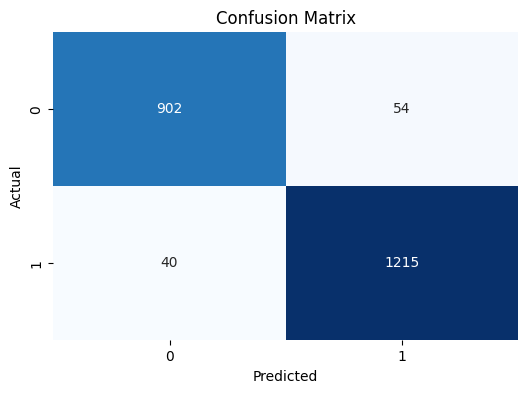

In [62]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


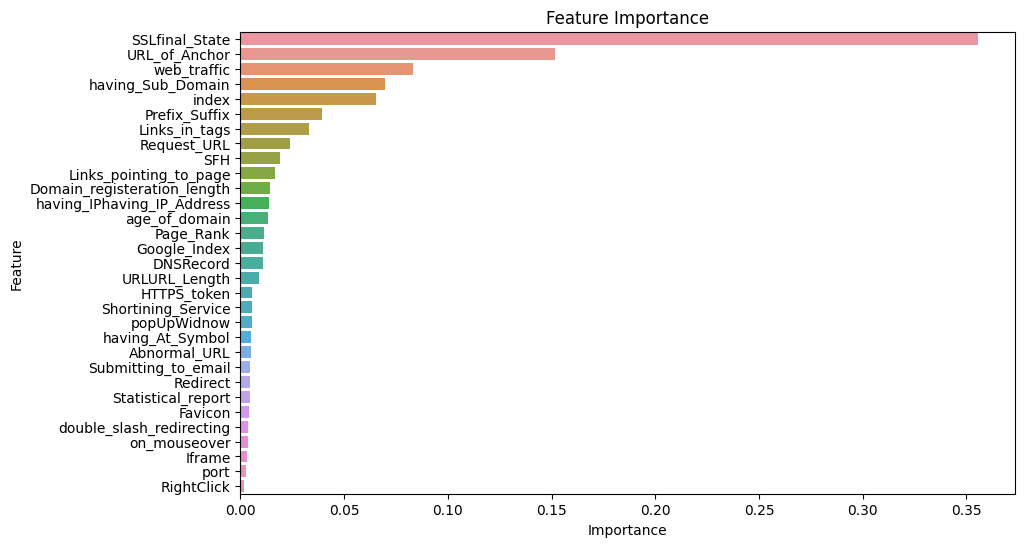

In [55]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()
